In [2]:
import numpy as np, h5py
from scipy import signal
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [3]:
matplotlib.rcParams["figure.figsize"] = [15, 8]

### Matlab to numpy

In [4]:
f = h5py.File('sample_data.mat','r')

In [5]:
f.keys()

<KeysViewHDF5 ['LFP1CH']>

In [6]:
matlab_data = np.array(f.get("LFP1CH")).reshape(1, -1)[0]

In [20]:
matlab_data.max()

32767.0

In [21]:
matlab_data.min()

-32767.0

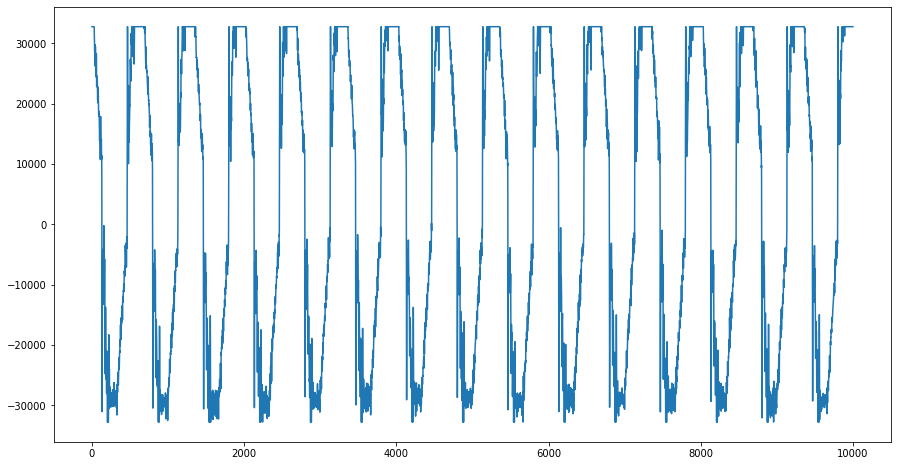

In [26]:
plt.plot(matlab_data[:10000])

(-50000.0, 50000.0)

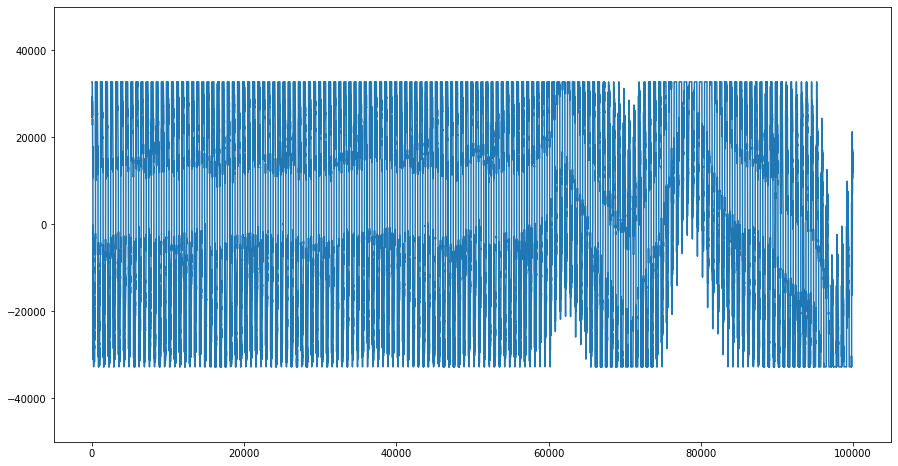

In [27]:
plt.plot(matlab_data[:100000])
plt.ylim(-50000, 50000)

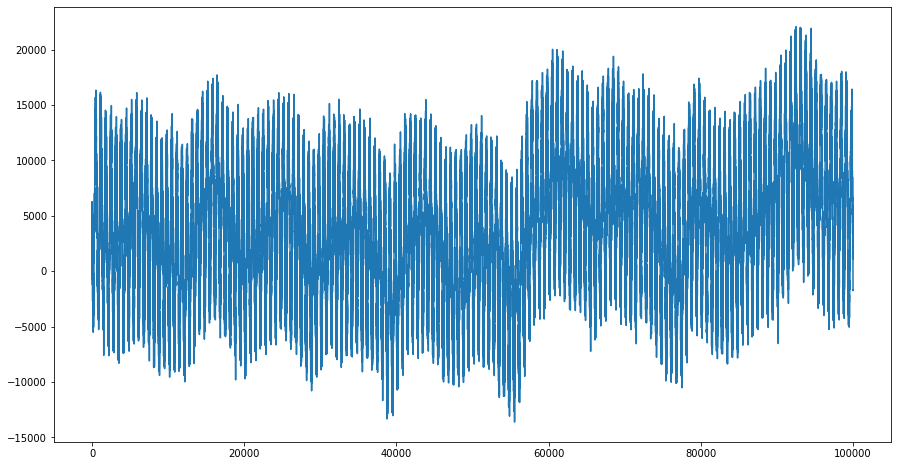

In [24]:
plt.plot(matlab_data[-200000:-100000])

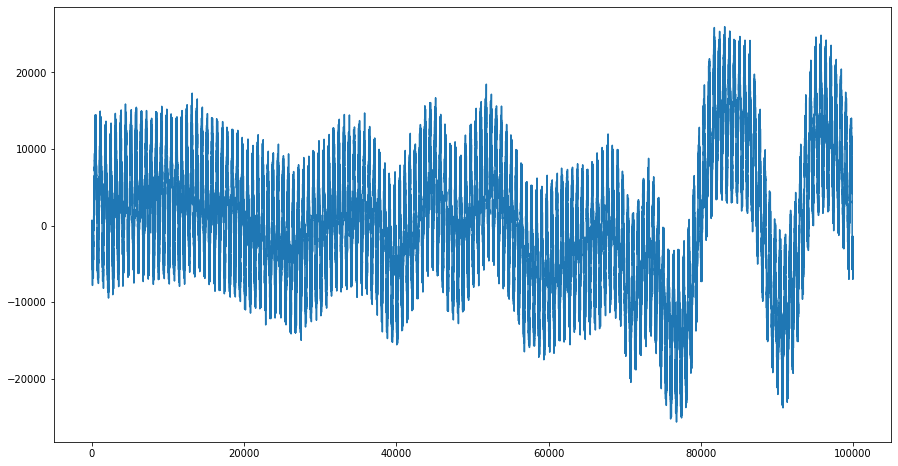

In [17]:
plt.plot(matlab_data[-100000:])

### [Bidirectional digital filter](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.filtfilt.html)

### [Pitfalls of Filtering the EEG Signal](https://sapienlabs.org/pitfalls-of-filtering-the-eeg-signal/)

In [3]:
t = np.linspace(0, 1.0, 2001)
xlow = np.sin(2 * np.pi * 5 * t)
xhigh = np.sin(2 * np.pi * 250 * t)
x = xlow + xhigh

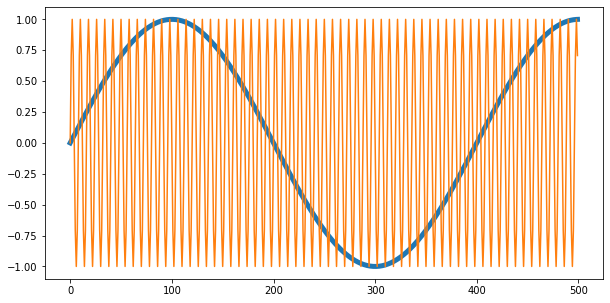

In [4]:
plt.plot(xlow[:500], linewidth=5)
plt.plot(xhigh[:500])

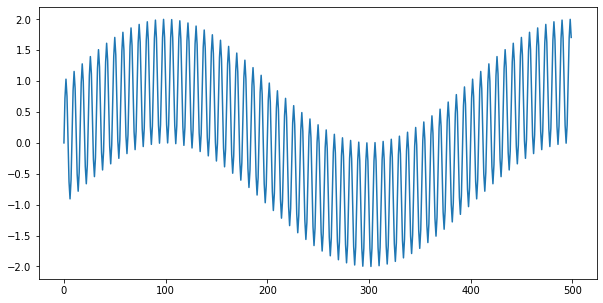

In [5]:
plt.plot(x[:500])

### design filters

In [6]:
b_butter, a_butter = signal.butter(8, 0.125)

In [7]:
b_ellip, a_ellip = signal.ellip(4, 0.01, 120, 0.125)

### apply butter filter

In [8]:
y = signal.filtfilt(b_butter, a_butter, x, padlen=150)

*returns approximately the low frequency component*

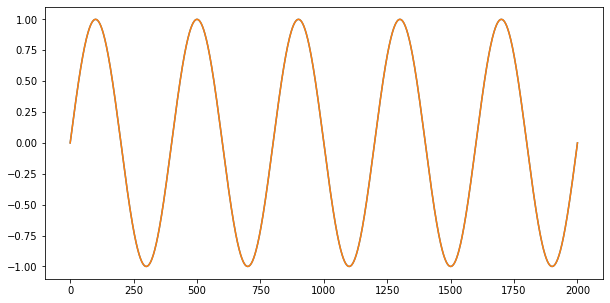

In [10]:
plt.plot(y)
plt.plot(xlow)

### generate random signal

In [11]:
n = 60
sig = np.random.randn(n) ** 3 + 3 * np.random.randn(n).cumsum()

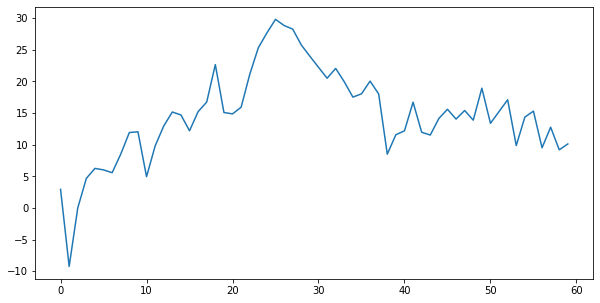

In [12]:
plt.plot(sig)

### apply elliptic filter

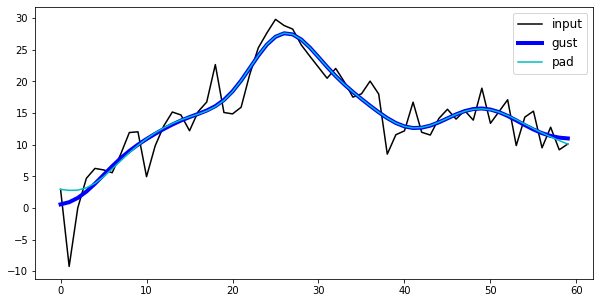

In [14]:
fgust = signal.filtfilt(b_ellip, a_ellip, sig, method="gust")
fpad = signal.filtfilt(b_ellip, a_ellip, sig, padlen=50)
plt.plot(sig, "k-", label="input")
plt.plot(fgust, "b-", linewidth=4, label="gust")
plt.plot(fpad, "c-", linewidth=1.5, label="pad")
plt.legend(loc="best", fontsize="large")